# Example 6.2 : Vibration in a one-dimensional system 

## Set up

Suppose we have a set of N identical masses in a row, joined by identical linear springs.  
Let us denote the displacement of the $i$-th mass relative to its rest position by $\xi_i$. Then the equations of motion for the system are  
$m\frac{d^2\xi_1}{dt^2} = k(\xi_2 - \xi_1) + F_1$  
$m\frac{d^2\xi_i}{dt^2} = k(\xi_{i+1} - \xi_i) - k(\xi_i - \xi_{i-1}) + F_i \quad {\rm for} \quad i=2,\dots,N-1$  
$m\frac{d^2\xi_N}{dt^2} =                      - k(\xi_N - \xi_{N-1}) + F_N$,  
where $F_i$ is an external force acting on the $i$-th mass.  

In this note, we consider the case where only $F_1 = Ce^{i\omega t}$ and the other $F_i=0$.  I mean, constantly oscillating force is applied only to the first (leftmost) mass.  
With this setup, derive the resulting stationary motion of each mass in the system.  

## Analysis

During the short time after the force starts acting on the first mass, motion at frequencies other than $\omega$ might be excited. However, over a long time, such motions are likely to dissipate due to friction with external environment, and only motion with frequency $\omega$ will remain.  
With this assumption, we set an ansatz,   
$\xi_i(t) = x_i e^{i\omega t}$,  
where $x_i$ is generally a complex number; its magnitude represents the amplitude of the oscillation, and its phase represents the phase shift.  
Putting this ansatz into the equation of motion, we get a set of linear equations: 
$$
\begin{pmatrix}
\alpha-k & -k      &        &          &         &        &  \\
-k       & \alpha  & -k     &          &         &        &  \\
         & -k      & \alpha & -k       &         &        &  \\
         &         & \ddots &  \ddots  & \ddots  &        &  \\
         &         &        &          &  -k     & \alpha &  -k \\
         &         &        &          &         &  -k &  \alpha-k 
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2  \\
x_3  \\
\vdots \\
x_{N-1} \\
x_N 
\end{pmatrix}
=
\begin{pmatrix}
C \\
0 \\
0 \\
\vdots \\
0 \\
0
\end{pmatrix},
$$
where $\alpha \equiv 2k-m\omega^2$.  
Since all of $\alpha, k, C$ are real numbers, we see that $x_i$ can be taken to be real as well; there is no phase shift.  
I do not know whether this equation can be solved analytically, so I will rely on numerical computation below.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi

In [2]:
def solve(N, m, k, C, omega, check=False):
    """
    This function solves the liner equation above, and return the solution x_1, ...., x_N
    """
    alpha = 2*k - m*omega*omega

    # initialize A and v
    A = np.zeros([N,N])    # not memory-efficient, but for simplicity
    A[0, 0] = alpha - k
    A[0, 1] = -k
    for i in range(1, N-1):
        A[i, i-1] = -k
        A[i, i]   = alpha
        A[i, i+1] = -k
    A[N-1, N-2] = -k
    A[N-1, N-1] = alpha -k 
    v = np.zeros(N)
    v[0] = C

    if check:  # at the last in this function, check that our solutoin is equal to that by numpy solve  
        x_lib = np.linalg.solve(A,v)

    # Gaussian elimination
    for i in range(N-1):
        # divide i-th row by the diagonal element A[i,i]
        # by having Gaussian elimination to (i-1)th row, only [i,i] and [i,i+1] are nonzero in i-th row. 
        assert abs(A[i,i])>1e-4, (i, A[i,i])  # we ensure no division by number close to 0
        A[i,i+1] /= A[i,i]
        v[i] /= A[i,i]
        A[i,i] = 1

        # subtract i-th row (with multiplied by A[i+1,i]) from (i+1)th row
        A[i+1,i+1] -= A[i+1,i]*A[i,i+1]
        #  A[i+1,i+2] is generally non-zero, but we do nothing on this element because A[i,i+2] is zero
        if check and i<N-2: 
            assert A[i, i+2] == 0
        v[i+1] -= A[i+1,i]*v[i]
        A[i+1,i] = 0   # same as -= A[i+1,i]*A[i,i] since A[i,i]=1
    assert abs(A[N-1,N-1])>1e-4
    v[N-1] /= A[N-1,N-1]
    A[N-1, N-1] = 1

    # After Gaussian elimination, A should be A[i,i]=1 and A[i,i+1]=nonzero for i=0,...,N-2 and A[N-1,N-1]=1
    #     check this if you want
    if check:
        for i in range(N):
            for k in range(N):
                if i==k:
                    assert A[i,k] == 1
                elif i<N-1 and i+1==k:
                    assert A[i,k] != 0
                else:
                    assert A[i,k] == 0
                    
    # Back substitution
    x = np.empty(N)
    x[N-1] = v[N-1]
    for i in range(N-2, -1, -1):
        x[i] = v[i] - A[i,i+1]*x[i+1]

    if check:
        assert np.isclose(x, x_lib).all(), f"\nA={A}\nv={v}\nx_ours={x}\nx_lib ={x_lib}"
    
    return x

We fix parameters as $m=1.0, k=6.0, C=1.0, \omega=2.0$ as suggested in the textbook, but we vary the value of $N$.

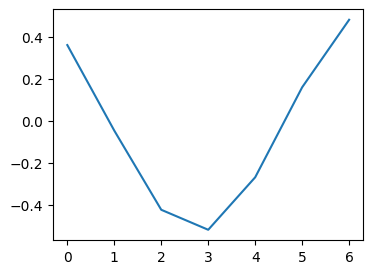

<Figure size 640x480 with 0 Axes>

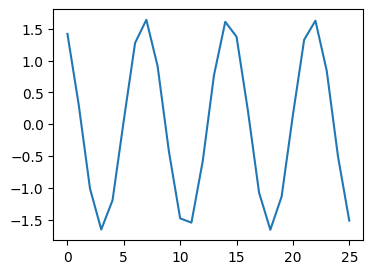

<Figure size 640x480 with 0 Axes>

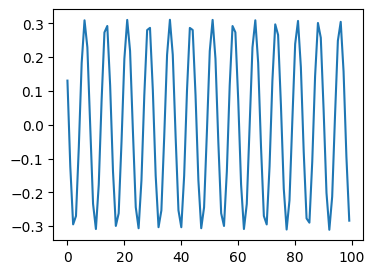

<Figure size 640x480 with 0 Axes>

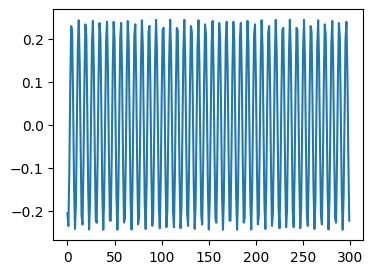

<Figure size 640x480 with 0 Axes>

In [3]:
m = 1.0
k = 6.0
C = 1.0
omega = 2.0
for N in [7, 26, 100, 300]:
    x = solve(N, m, k, C, omega, check=True)
    plt.figure(figsize=(4,3))
    plt.plot(x)
    plt.show()
    plt.clf()

We see that the amplitude of each mass oscillate spatially with period $\sim 7$.  

### Interpretation of the result
In general, waves with various frequencies can propagate in the system.  By putting $\xi_n = e^{i(qn-\omega t)}$ into the equation of motion, we get the dispersion relation  
$\omega = 2\sqrt{\frac{k}{m}}|\sin\left(\frac{q}{2}\right)|$.  

Due to the external force with frequency $\omega$, only a wave with that frequency $\omega$ can exist in the stationary state.  What we observed in the result is a standing wave with that frequency $\omega$, and the period (or dimensionless wave number $q$) is determined from that $\omega$ via the dispersion relation.    
With $m=1.0, k=6.0, \omega=2.0$, then we find the period is:

In [4]:
q = 2*np.arcsin(omega/2*sqrt(m/k))
period = 2*pi/q
print(period)

7.470478365264605


This is consistent with our observation.  

### TO DO:  
 - In this note we set only $F_1$ as nonzero.  Will the result (i.e., standing wave with frequency $\omega$) be the same when the other $F_i$ is applied with the same frequency $\omega$?
 - From our result, the maximum of the amplitude seems to decrease with increasing $N$.  Why?